# University Admissions Dashboard

This dashboard visualizes key factors affecting university admission probability
using demographic, academic, and entrance exam features.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../data_1/College_Admission.csv")
df.head()


student_id  age  gender category          state preferred_stream  \
0      250.99   17   other  general         odisha       management   
1      250.99   20   other      ews        gujarat      agriculture   
2      250.99   19  female       sc  uttar pradesh         pharmacy   
3      250.99   18    male      ews      meghalaya             arts   
4      250.99   18    male       sc      rajasthan      engineering   

  entrance_exam  entrance_score  board_percentage  extracurricular_score  \
0           cet              30             95.58                      2   
1          none               0             75.45                      2   
2           cet             120             75.36                     10   
3           cet             179             52.49                      2   
4           jee             295             92.48                      7   

   admission_probability admission_status scholarship_eligibility  
0                  0.387         admitted                     yes  
1                  0.221         rejected                      no  
2                  0.446         rejected                      no  
3                  0.174         admitted                      no  
4                  0.634         admitted                     yes

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               25000 non-null  float64
 1   age                      25000 non-null  int64  
 2   gender                   25000 non-null  object 
 3   category                 25000 non-null  object 
 4   state                    25000 non-null  object 
 5   preferred_stream         25000 non-null  object 
 6   entrance_exam            25000 non-null  object 
 7   entrance_score           25000 non-null  int64  
 8   board_percentage         25000 non-null  float64
 9   extracurricular_score    25000 non-null  int64  
 10  admission_probability    25000 non-null  float64
 11  admission_status         25000 non-null  object 
 12  scholarship_eligibility  25000 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 2.5+ MB


student_id           age  entrance_score  board_percentage  \
count  25000.000000  25000.000000    25000.000000      25000.000000   
mean   12500.500000     18.492440       77.879760         75.028014   
std     7212.732314      1.116205      120.356125         14.438767   
min      250.990000     17.000000        0.000000         50.440000   
25%     6250.750000     17.000000        0.000000         62.550000   
50%    12500.500000     18.000000       20.000000         75.070000   
75%    18750.250000     19.000000      126.000000         87.640000   
max    24750.010000     20.000000      634.000000         99.530000   

       extracurricular_score  admission_probability  
count           25000.000000           25000.000000  
mean                4.990920               0.323997  
std                 3.158942               0.142427  
min                 0.000000               0.041990  
25%                 2.000000               0.219000  
50%                 5.000000               0.319000  
75%                 8.000000               0.419000  
max                10.000000               0.731010

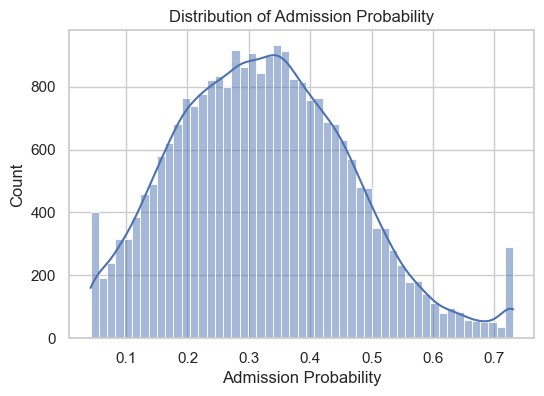

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['admission_probability'], kde=True)
plt.title("Distribution of Admission Probability")
plt.xlabel("Admission Probability")
plt.ylabel("Count")
plt.show()


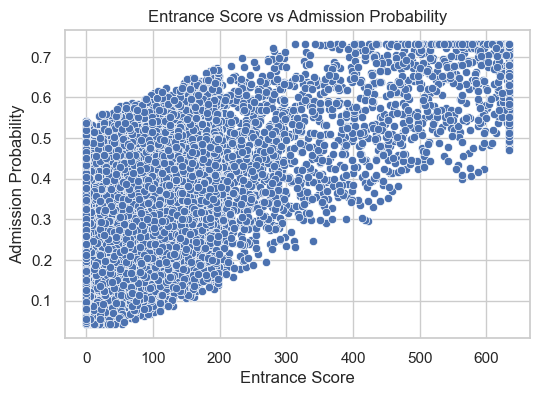

In [5]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='entrance_score',
    y='admission_probability',
    data=df
)
plt.title("Entrance Score vs Admission Probability")
plt.xlabel("Entrance Score")
plt.ylabel("Admission Probability")
plt.show()


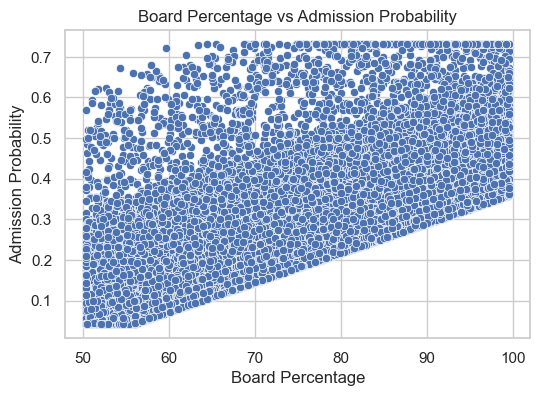

In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='board_percentage',
    y='admission_probability',
    data=df
)
plt.title("Board Percentage vs Admission Probability")
plt.xlabel("Board Percentage")
plt.ylabel("Admission Probability")
plt.show()


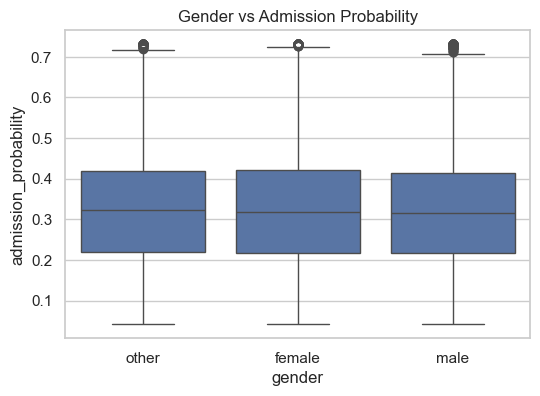

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='gender',
    y='admission_probability',
    data=df
)
plt.title("Gender vs Admission Probability")
plt.show()


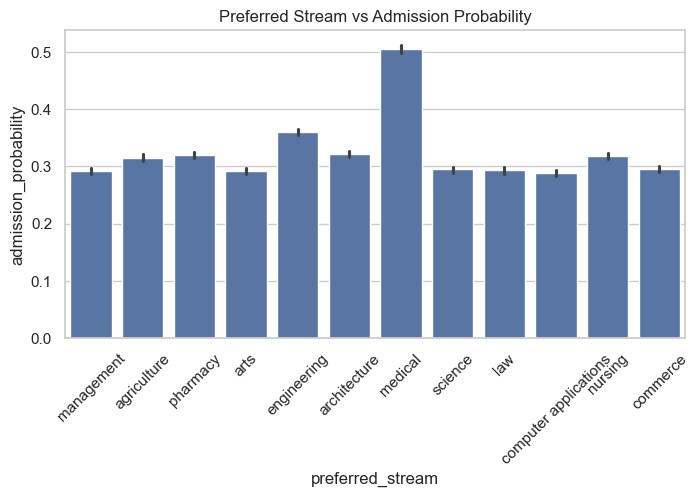

In [8]:
plt.figure(figsize=(8,4))
sns.barplot(
    x='preferred_stream',
    y='admission_probability',
    data=df
)
plt.xticks(rotation=45)
plt.title("Preferred Stream vs Admission Probability")
plt.show()


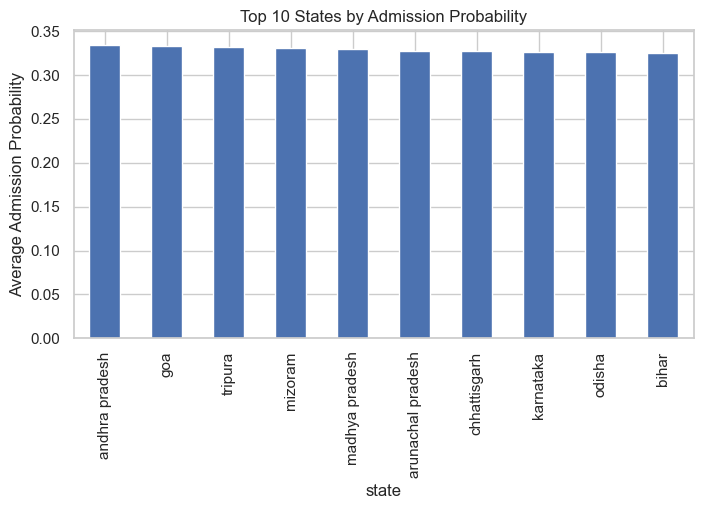

In [9]:
top_states = (
    df.groupby('state')['admission_probability']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(8,4))
top_states.plot(kind='bar')
plt.title("Top 10 States by Admission Probability")
plt.ylabel("Average Admission Probability")
plt.show()


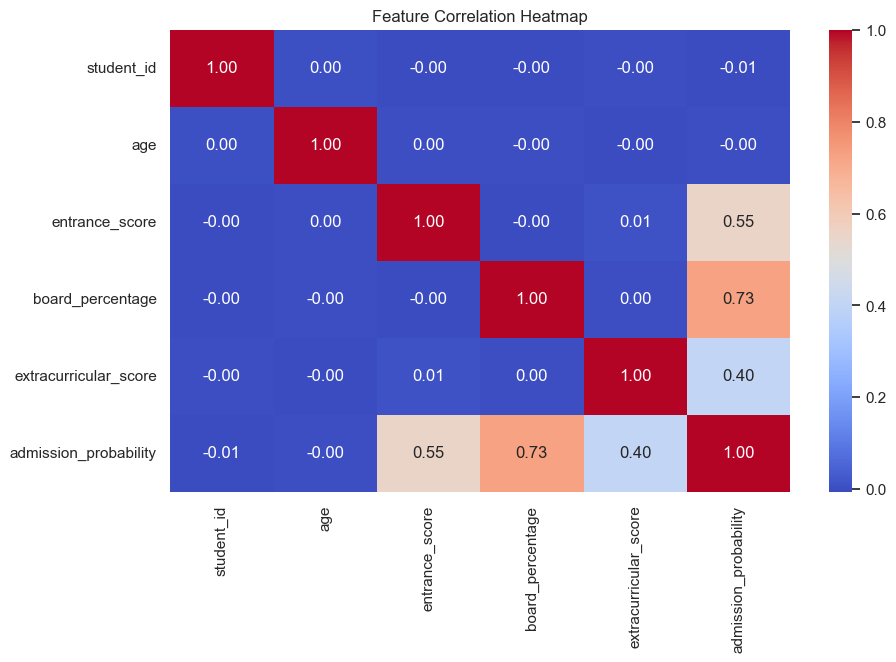

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Heatmap")
plt.show()


## Key Insights

- Entrance exam score and board percentage strongly influence admission probability.
- Preferred stream shows noticeable variation in admission chances.
- Demographic features have less impact compared to academic performance.
- Admission probability follows a near-normal distribution.


## Conclusion

This dashboard provides an interactive analytical overview of factors influencing
university admissions. Academic performance and entrance exam results are the
strongest predictors of admission probability.
